In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler


In [2]:
df_train = pd.read_csv('./dataset/PSM/train.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='timestamp_(min)'
                   )

ValueError: Index timestamp_(min) invalid

In [2]:
df_test = pd.read_csv('./dataset/PSM/test.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='timestamp_(min)'
                   )

In [3]:
df_test_label = pd.read_csv('./dataset/PSM/test_label.csv',
                            index_col='timestamp_(min)'
                            )

In [9]:
count_of_ones = (df_test_label['label'] == 1).sum()
count_of_zeros = (df_test_label['label'] == 0).sum()

print(f'Number of 1s: {count_of_ones}')
print(f'Number of 0s: {count_of_zeros}')


Number of 1s: 24381
Number of 0s: 63460


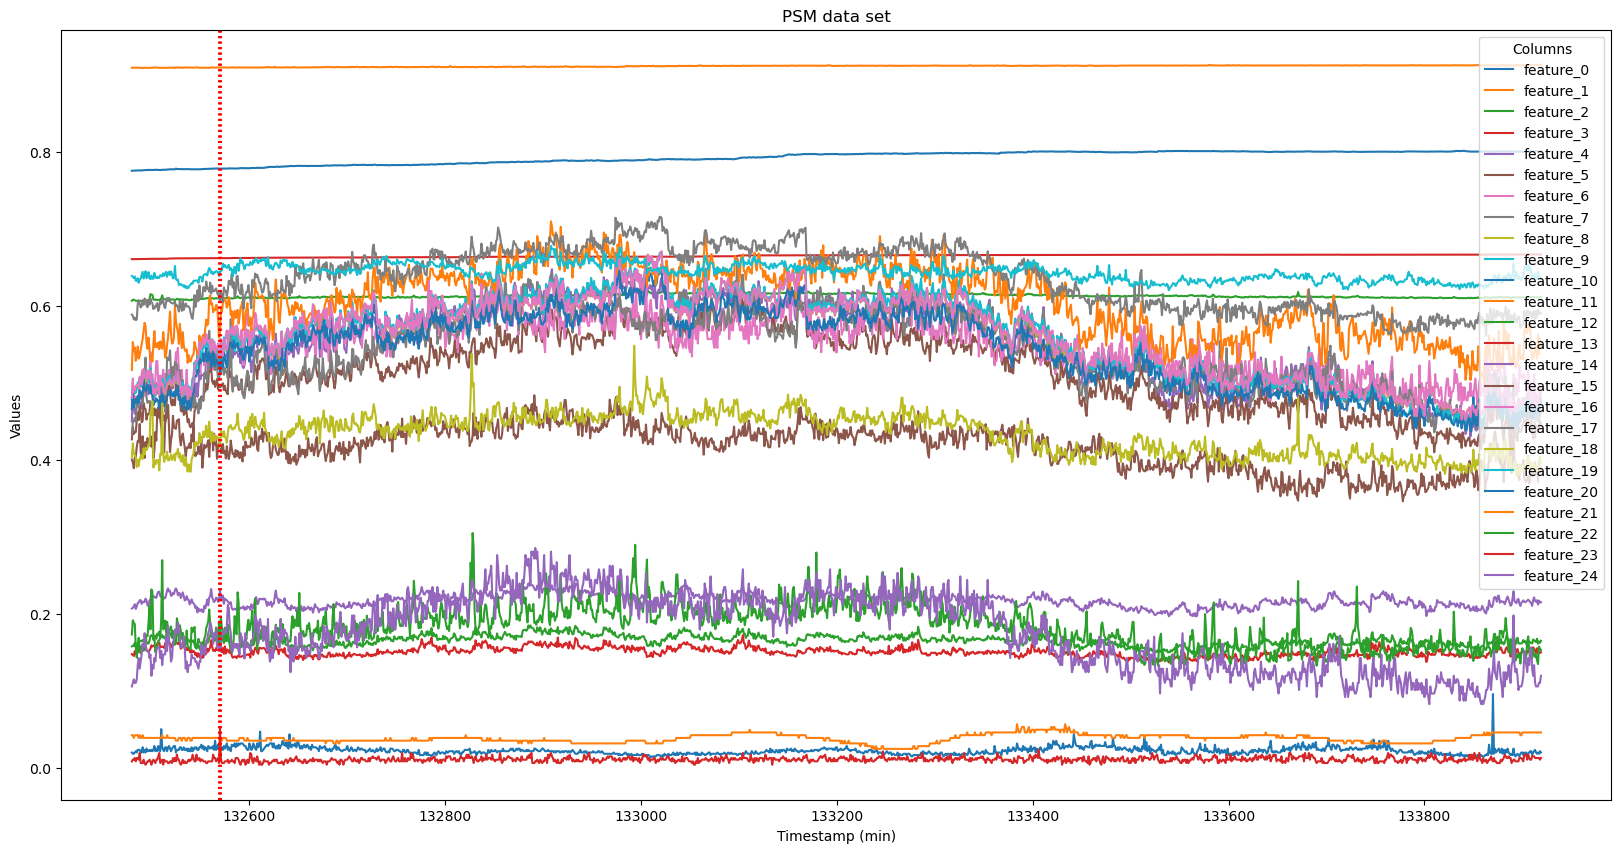

In [10]:
x = 60*24
df_test_subset = df_test.head(x)
df_test_label_subset = df_test_label.head(x)



# Plot all columns in one plot
df_test_subset.plot(figsize=(20, 10), linestyle='-')
#df_test_label_subset['label'].plot(linestyle='-', label='label', color='red')
# Plot a vertical line when the label is 1
for timestamp, label in zip(df_test_label_subset.index, df_test_label_subset['label']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('PSM data set')
plt.xlabel('Timestamp (min)')
plt.ylabel('Values')
plt.legend(title='Columns')

# Show the plot
plt.show()

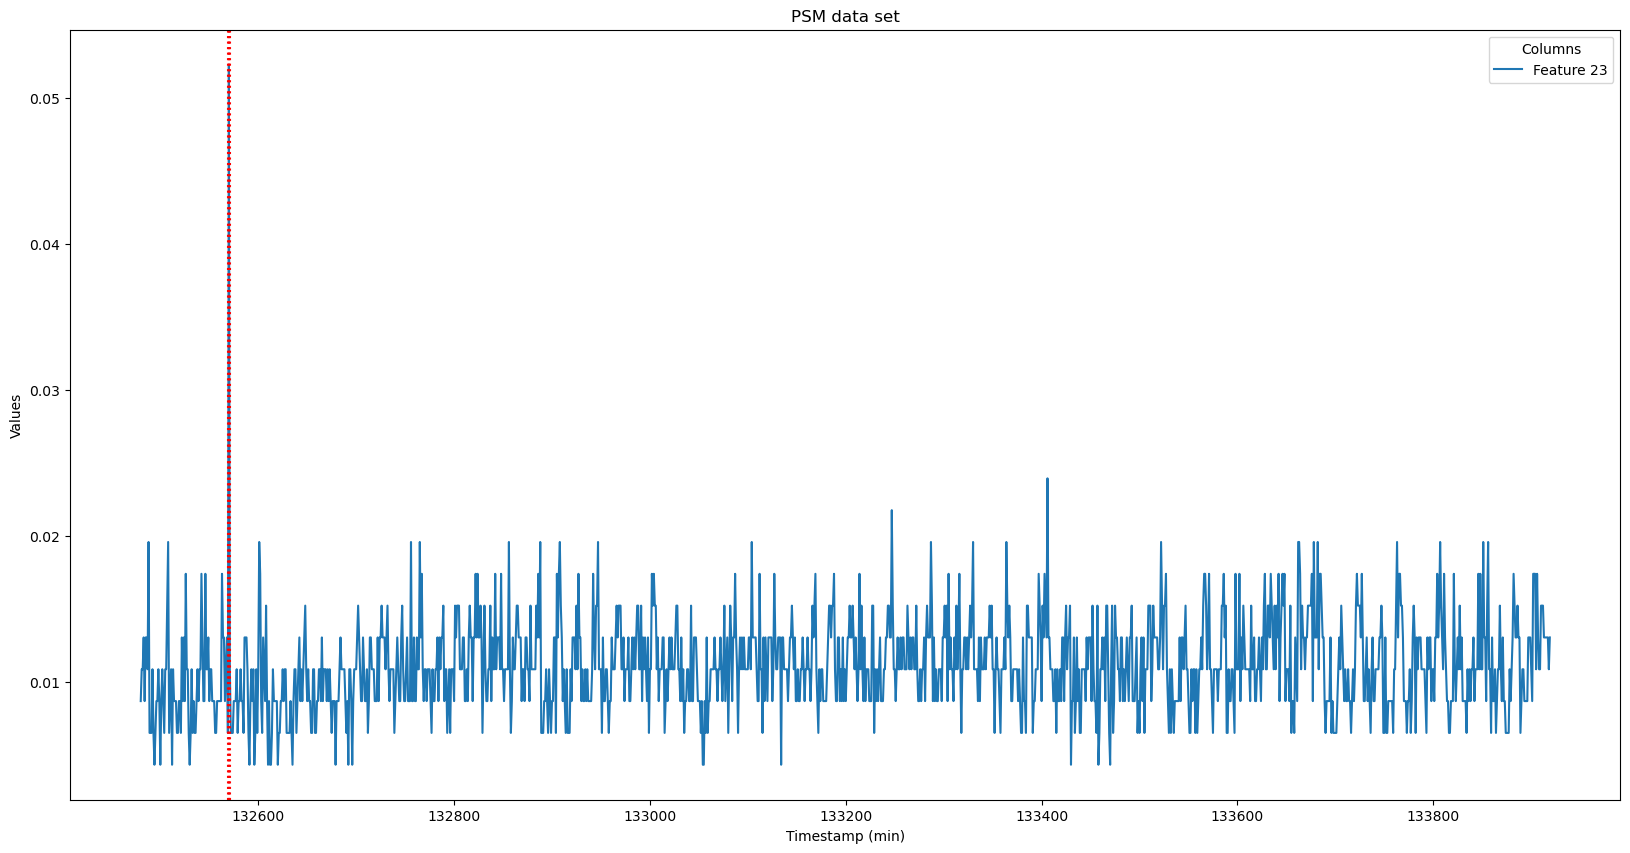

In [11]:
x = 60*24
df_test_subset = df_test.head(x)
df_test_label_subset = df_test_label.head(x)

# Plot the feature
plt.figure(figsize=(20, 10))
plt.plot(df_test_subset['feature_23'], linestyle='-', label='Feature 23')

# Plot a vertical line when the label is 1
for timestamp, label in zip(df_test_label_subset.index, df_test_label_subset['label']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('PSM data set')
plt.xlabel('Timestamp (min)')
plt.ylabel('Values')
plt.legend(title='Columns')

# Show the plot
plt.show()


# IHEPC

In [2]:
df_ihepc_test = pd.read_csv('./dataset/PSM/test.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

In [3]:
df_ihepc_train = pd.read_csv('./dataset/PSM/train.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

In [4]:
df_ihepc_predictions = pd.read_csv('./dataset/PSM/temp_pred.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

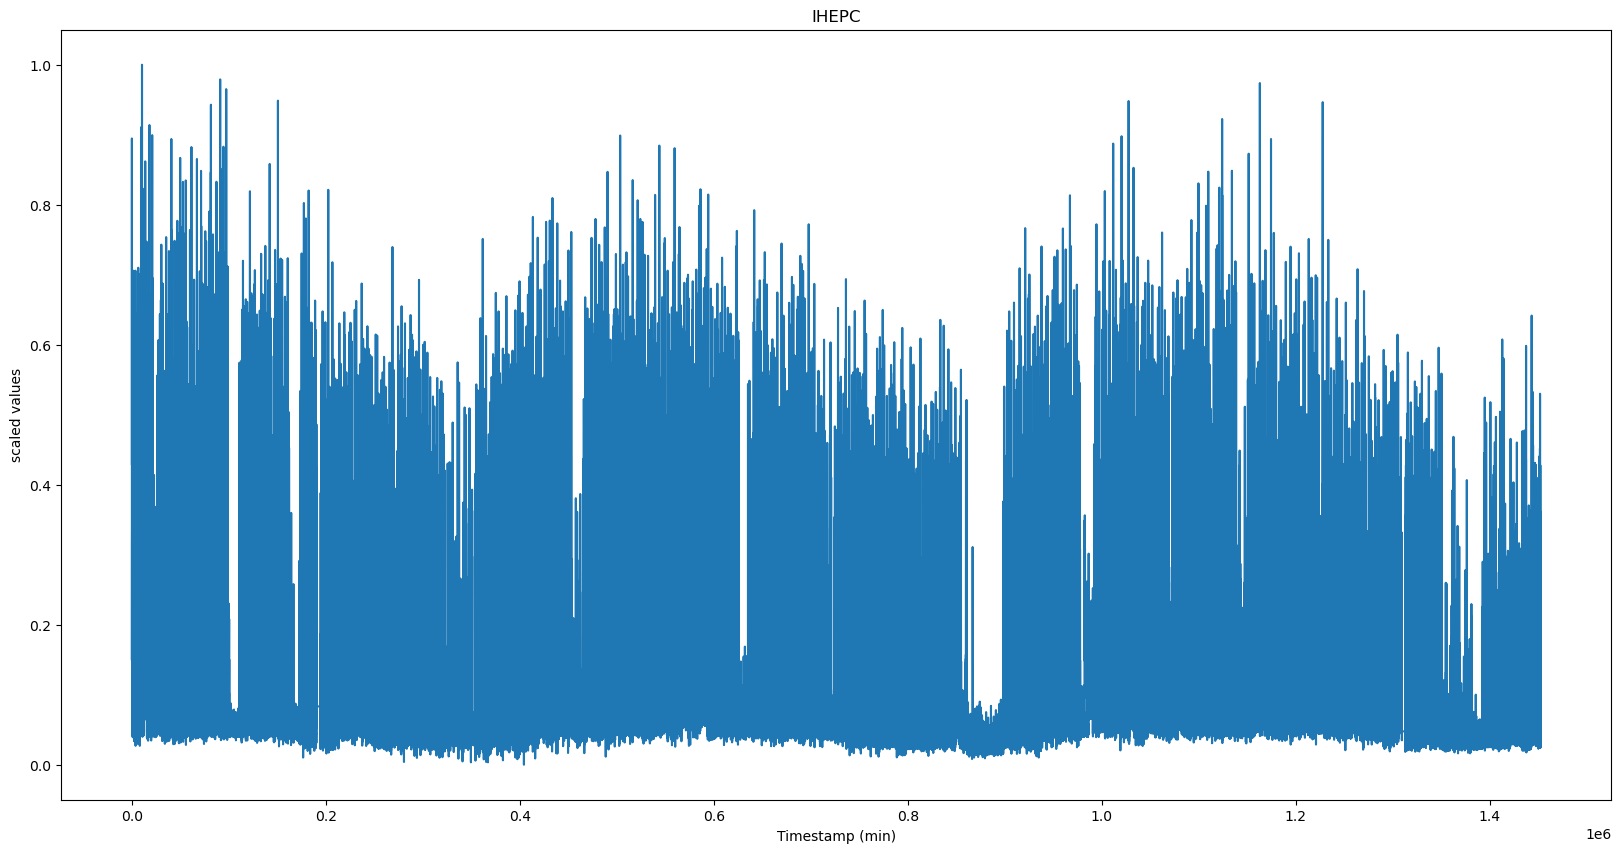

In [5]:
x =  len(df_ihepc_train) #60*24
df_ihepc_train_subset = df_ihepc_train.head(x)

plt.figure(figsize=(20, 10))
plt.plot(df_ihepc_train_subset['0'], linestyle='-', label='power consumption scaled')


# Customize the plot (optional)
plt.title('IHEPC')
plt.xlabel('Timestamp (min)')
plt.ylabel('scaled values')

# Show the plot
plt.show()

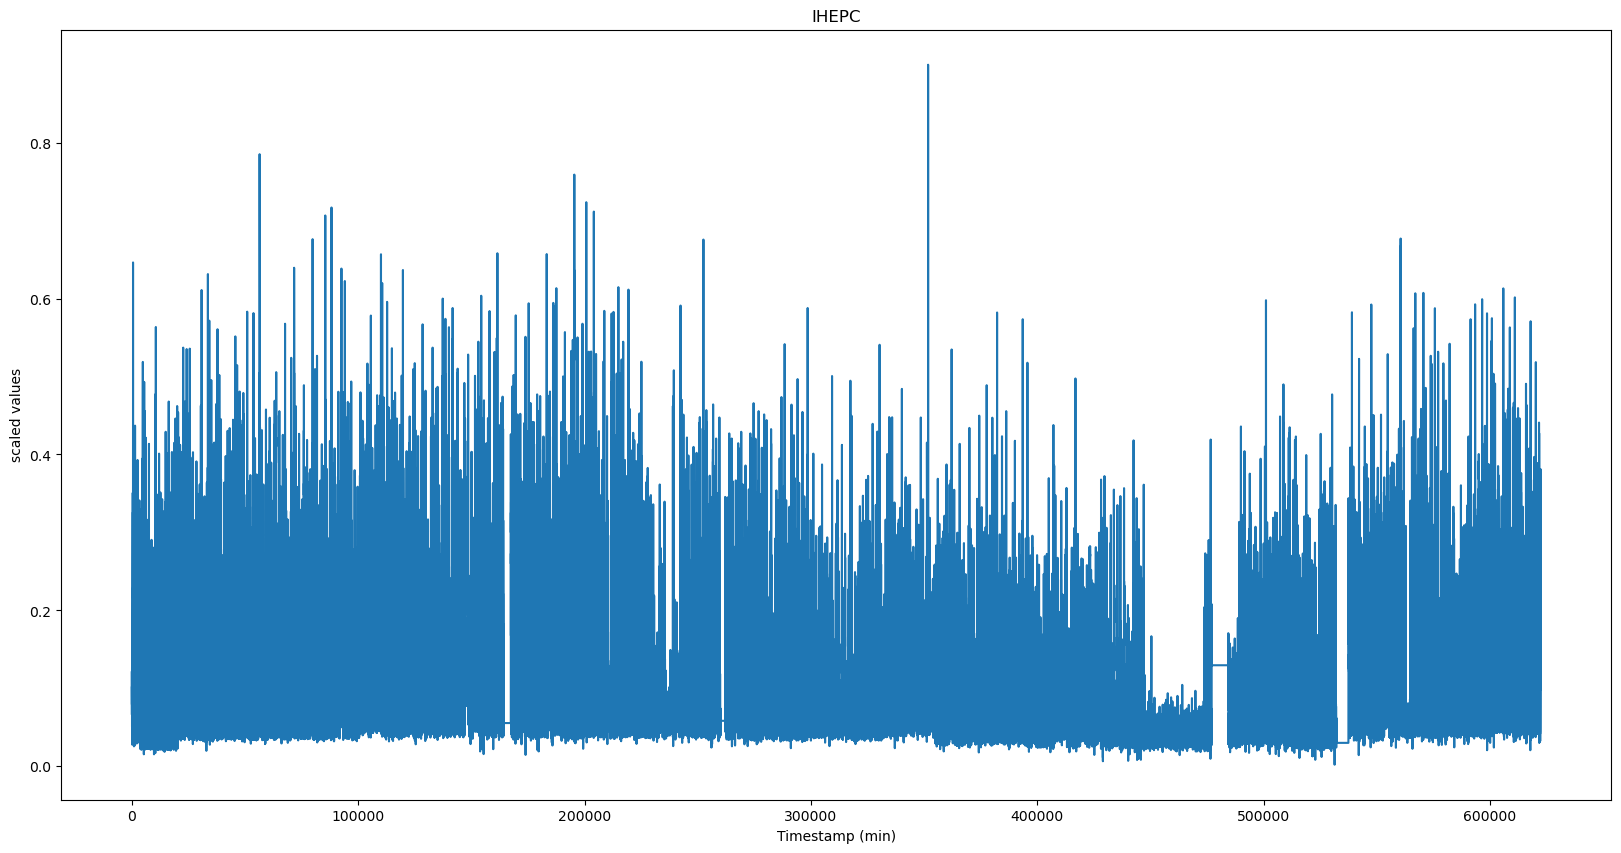

In [7]:
x =  len(df_ihepc_test) #60*24
df_ihepc_test_subset = df_ihepc_test.head(x)

plt.figure(figsize=(20, 10))
plt.plot(df_ihepc_test_subset['0'], linestyle='-', label='power consumption scaled')


# Customize the plot (optional)
plt.title('IHEPC')
plt.xlabel('Timestamp (min)')
plt.ylabel('scaled values')

# Show the plot
plt.show()

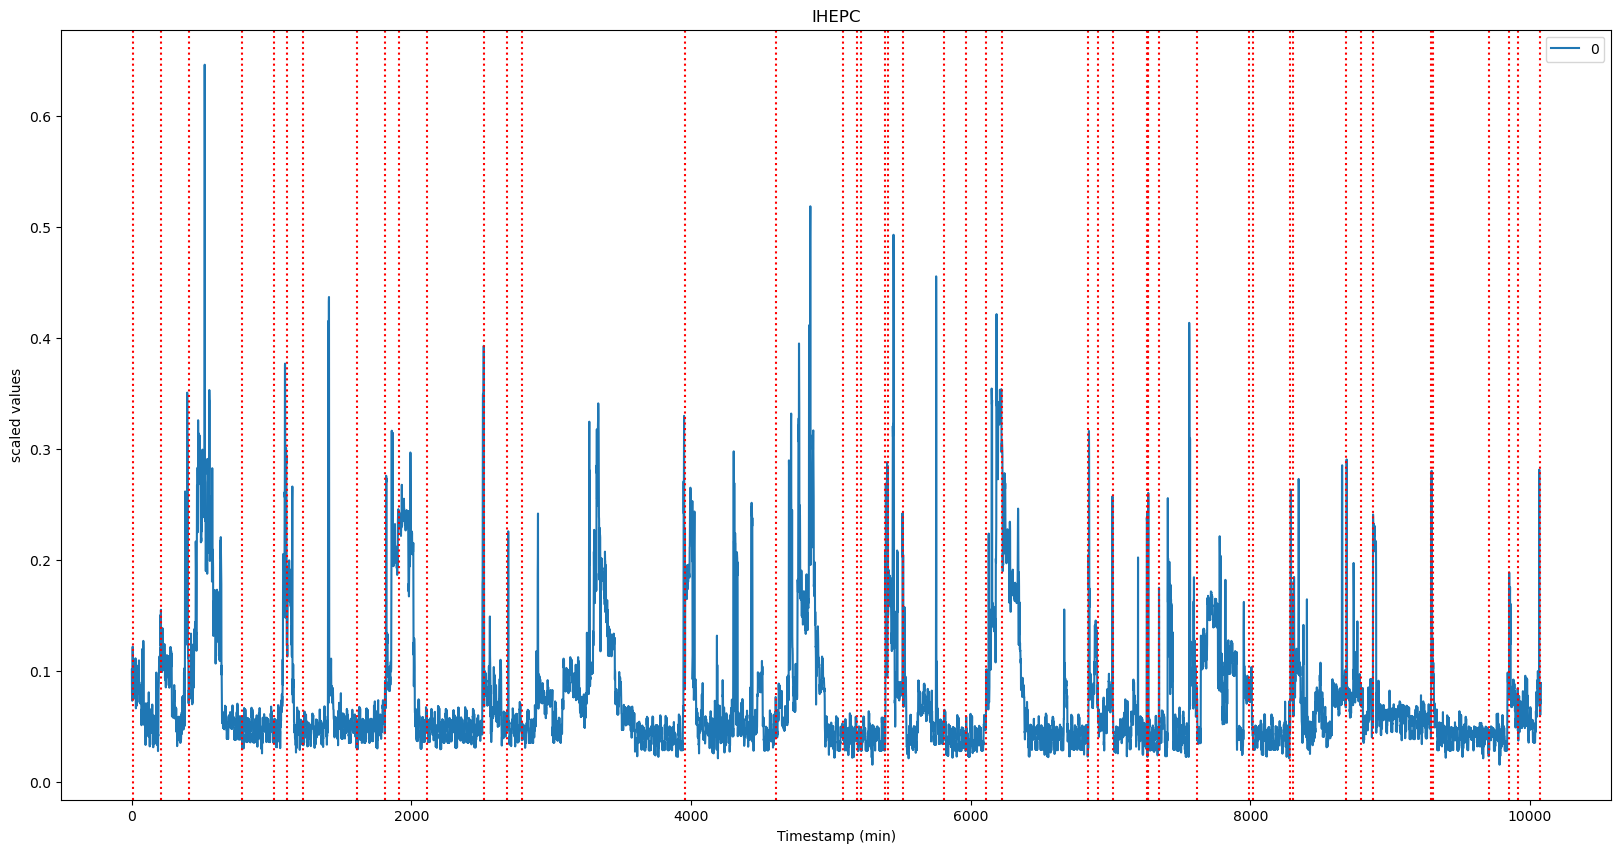

In [21]:
x = 60*24*7 #math.ceil(len(df_ihepc_test) / 20) #60*24*7
df_ihepc_test_subset = df_ihepc_test.head(x)
df_ihepc_predictions_subset = df_ihepc_predictions.head(x)

# Plot all columns in one plot
df_ihepc_test_subset.plot(figsize=(20, 10), linestyle='-')
#df_test_label_subset['label'].plot(linestyle='-', label='label', color='red')
# Plot a vertical line when the label is 1
for timestamp, label in zip(df_ihepc_predictions_subset.index, df_ihepc_predictions_subset['0']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('IHEPC')
plt.xlabel('Timestamp (min)')
plt.ylabel('scaled values')

# Show the plot
plt.show()

df_ihepc_pred = pd.read_csv('./dataset/PSM/temp_pred.csv', 
                   index_col='Unnamed: 0'
                   )



count_of_ones = (df_ihepc_pred['0'] == 1).sum()
count_of_zeros = (df_ihepc_pred['0'] == 0).sum()

print(f'Number of 1s: {count_of_ones}')
print(f'Number of 0s: {count_of_zeros}')


In [91]:
np.random.seed(42)

num_entries = 622577

percentage_of_ones = 1

num_ones = int(num_entries * (percentage_of_ones / 100))

ihepc_labels = np.zeros(num_entries)
ihepc_labels[:num_ones] = 1
np.random.shuffle(ihepc_labels)

df_ihepc_labels = pd.DataFrame(ihepc_labels, columns=['label'])
df_ihepc_labels.to_csv('./dataset/IHEPC/test_label.csv')

# Load PyTorch models

In [38]:
from model.AnomalyTransformer import AnomalyTransformer


modelPSM = AnomalyTransformer(win_size=100, enc_in=25, c_out=25)
path =  './checkpoints/PSM_checkpoint.pth'

modelPSM.load_state_dict(torch.load(path))
modelPSM.eval()

AnomalyTransformer(
  (embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(25, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (attention): AttentionLayer(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (inner_attention): AnomalyAttention(
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (query_projection): Linear(in_features=512, out_features=512, bias=True)
          (key_projection): Linear(in_features=512, out_features=512, bias=True)
          (value_projection): Linear(in_features=512, out_features=512, bias=True)
          (sigma_projection): Linear(in_features=512, out_features=8, bias=True)
          (out_projection): Linear(in_features=512, out_feat

In [39]:
modelSMD = AnomalyTransformer(win_size=100, enc_in=38, c_out=38)
path =  './checkpoints/SMD_checkpoint.pth'

modelSMD.load_state_dict(torch.load(path))
modelSMD.eval()

AnomalyTransformer(
  (embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(38, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (attention): AttentionLayer(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (inner_attention): AnomalyAttention(
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (query_projection): Linear(in_features=512, out_features=512, bias=True)
          (key_projection): Linear(in_features=512, out_features=512, bias=True)
          (value_projection): Linear(in_features=512, out_features=512, bias=True)
          (sigma_projection): Linear(in_features=512, out_features=8, bias=True)
          (out_projection): Linear(in_features=512, out_feat

In [34]:
df_train.shape

(132481, 25)

In [51]:
df_test.shape

(87841, 25)

In [71]:
X_test_tensor  = torch.tensor(df_test.values, dtype=torch.float32)

In [72]:
X_test_tensor.size()

torch.Size([87841, 25])

In [73]:
X_test_tensor.dim()

2

In [74]:
X_test_tensor = X_test_tensor.unsqueeze(0)

In [66]:
X_test_tensor = torch.permute(X_test_tensor, (1,0))

In [75]:
X_test_tensor.size()

torch.Size([1, 87841, 25])

In [80]:
X_test_tensor_truncated = X_test_tensor[:, :5000, :]

In [81]:
X_test_tensor_truncated.size()

torch.Size([1, 5000, 25])

In [83]:
with torch.no_grad():
  pred = modelPSM(X_test_tensor_truncated)

RuntimeError: The size of tensor a (100) must match the size of tensor b (5000) at non-singleton dimension 3

# OPSD  ---------------------------------------------

In [108]:
df_opsd_test = pd.read_csv('./dataset/PSM/test.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='date_time'
                   )

In [3]:
df_opsd_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20359 entries, 2015-10-10 17:00:00+00:00 to 2018-02-04 23:00:00+00:00
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DE_KN_residential4_grid_import  20359 non-null  float64
dtypes: float64(1)
memory usage: 318.1+ KB


In [4]:
num_rows = 20359
df_opsd_test_label = pd.DataFrame(0, index=range(num_rows), columns=['label'])

In [9]:
df_opsd_test_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20359 entries, 0 to 20358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   20359 non-null  int64
dtypes: int64(1)
memory usage: 318.1 KB


In [105]:
x = 18652 # Replace this with the desired index
df_opsd_test_label.loc[x, 'label'] = 1

In [17]:
df_opsd_test_label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [106]:
count_of_ones = (df_opsd_test_label['label'] == 1).sum()
count_of_zeros = (df_opsd_test_label['label'] == 0).sum()

print(f'Number of 1s: {count_of_ones}')
print(f'Number of 0s: {count_of_zeros}')


Number of 1s: 110
Number of 0s: 20249


In [107]:
df_opsd_test_label.to_csv('./dataset/PSM/test_label.csv')

In [123]:
df_opsd_predictions = pd.read_csv('./dataset/PSM/temp_pred.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

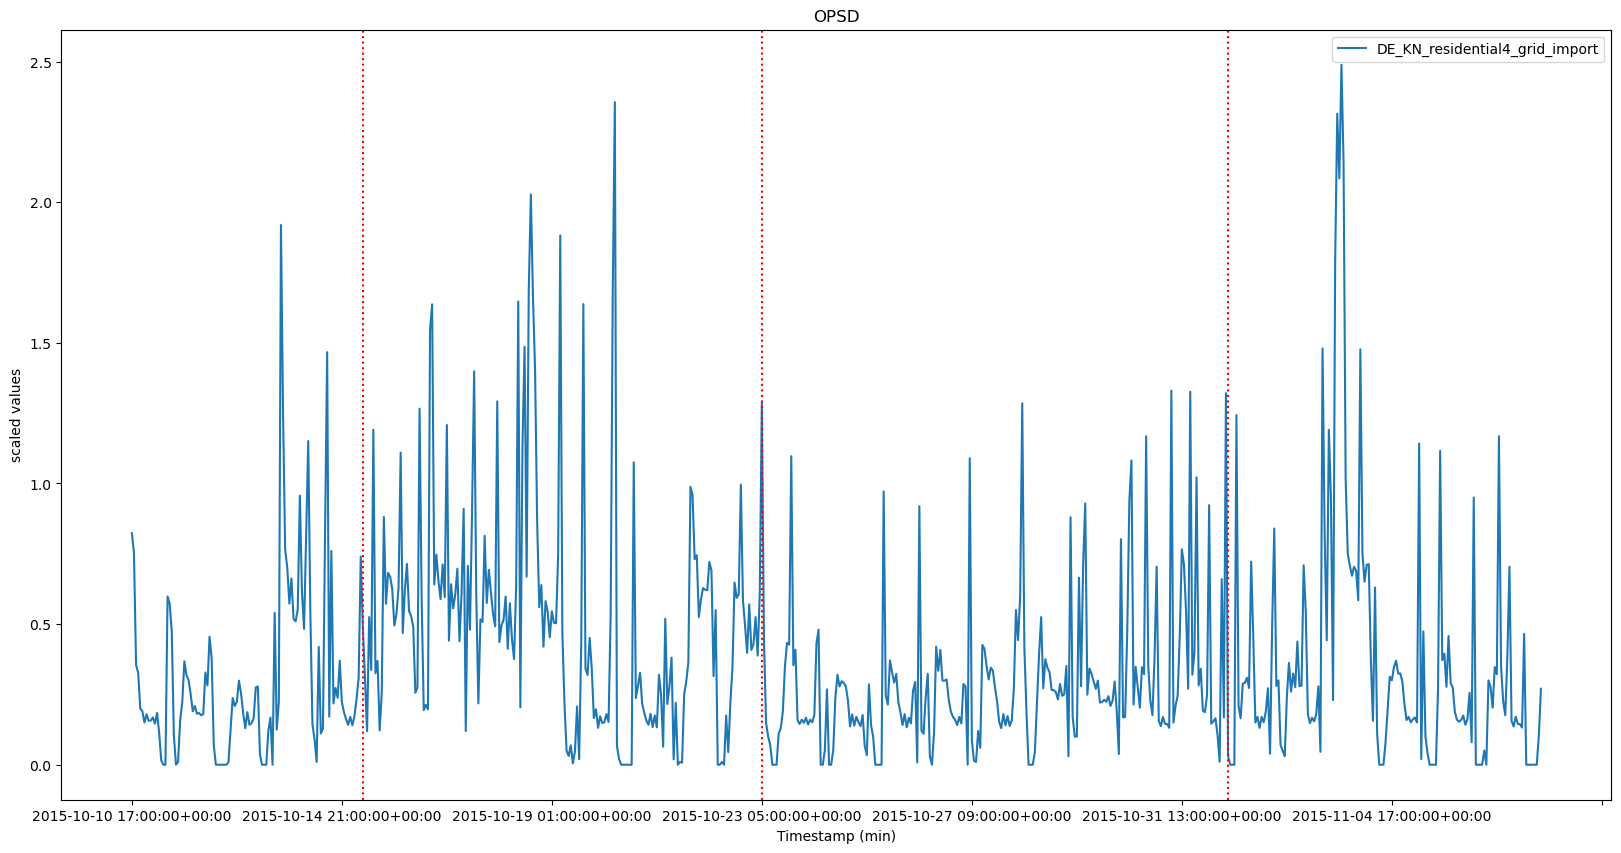

In [126]:
x =  24*7*4 # len(df_opsd_test) #60*24*7
df_opsd_test_subset = df_opsd_test.head(x)
df_opsd_predictions_subset = df_opsd_predictions.head(x)

# Plot all columns in one plot
df_opsd_test_subset.plot(figsize=(20, 10), linestyle='-')
#df_test_label_subset['label'].plot(linestyle='-', label='label', color='red')
# Plot a vertical line when the label is 1
for timestamp, label in zip(df_opsd_predictions_subset.index, df_opsd_predictions_subset['0']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('OPSD')
plt.xlabel('Timestamp (min)')
plt.ylabel('scaled values')

# Show the plot
plt.show()

# LGT  ---------------------------------------------

In [20]:
df_LGT_test = pd.read_csv('./dataset/PSM/test.csv', 
                   #parse_dates=['Date_time'], 
                   index_col='Unnamed: 0'
                   )

In [3]:
df_LGT_test_label = pd.read_csv('./dataset/PSM/test_label.csv')

In [4]:
count_of_ones = (df_LGT_test_label['label'] == 1).sum()
count_of_zeros = (df_LGT_test_label['label'] == 0).sum()

print(f'Number of 1s: {count_of_ones}')
print(f'Number of 0s: {count_of_zeros}')


Number of 1s: 32
Number of 0s: 35008


In [23]:
df_LGT_pred = pd.read_csv('./dataset/PSM/temp_pred.csv',
                          index_col='Unnamed: 0')

In [22]:
df_LGT_train = pd.read_csv('./dataset/PSM/train.csv', 
                   #parse_dates=['Date_time'], 
                   index_col='Unnamed: 0'
                   )

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_LGT_train)
LGT_train_scaled = scaler.transform(df_LGT_train)
LGT_test_scaled = scaler.transform(df_LGT_test)

In [7]:
df_LGT_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, Sonntag, 1. Januar 2023 00:15 to Sonntag, 31. Dezember 2023 00:00
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   total_substationS1[W]  35040 non-null  int64
 1   total_substationS2[W]  35040 non-null  int64
 2   total_substationS3[W]  35040 non-null  int64
 3   total_substationS4[W]  35040 non-null  int64
dtypes: int64(4)
memory usage: 1.3+ MB


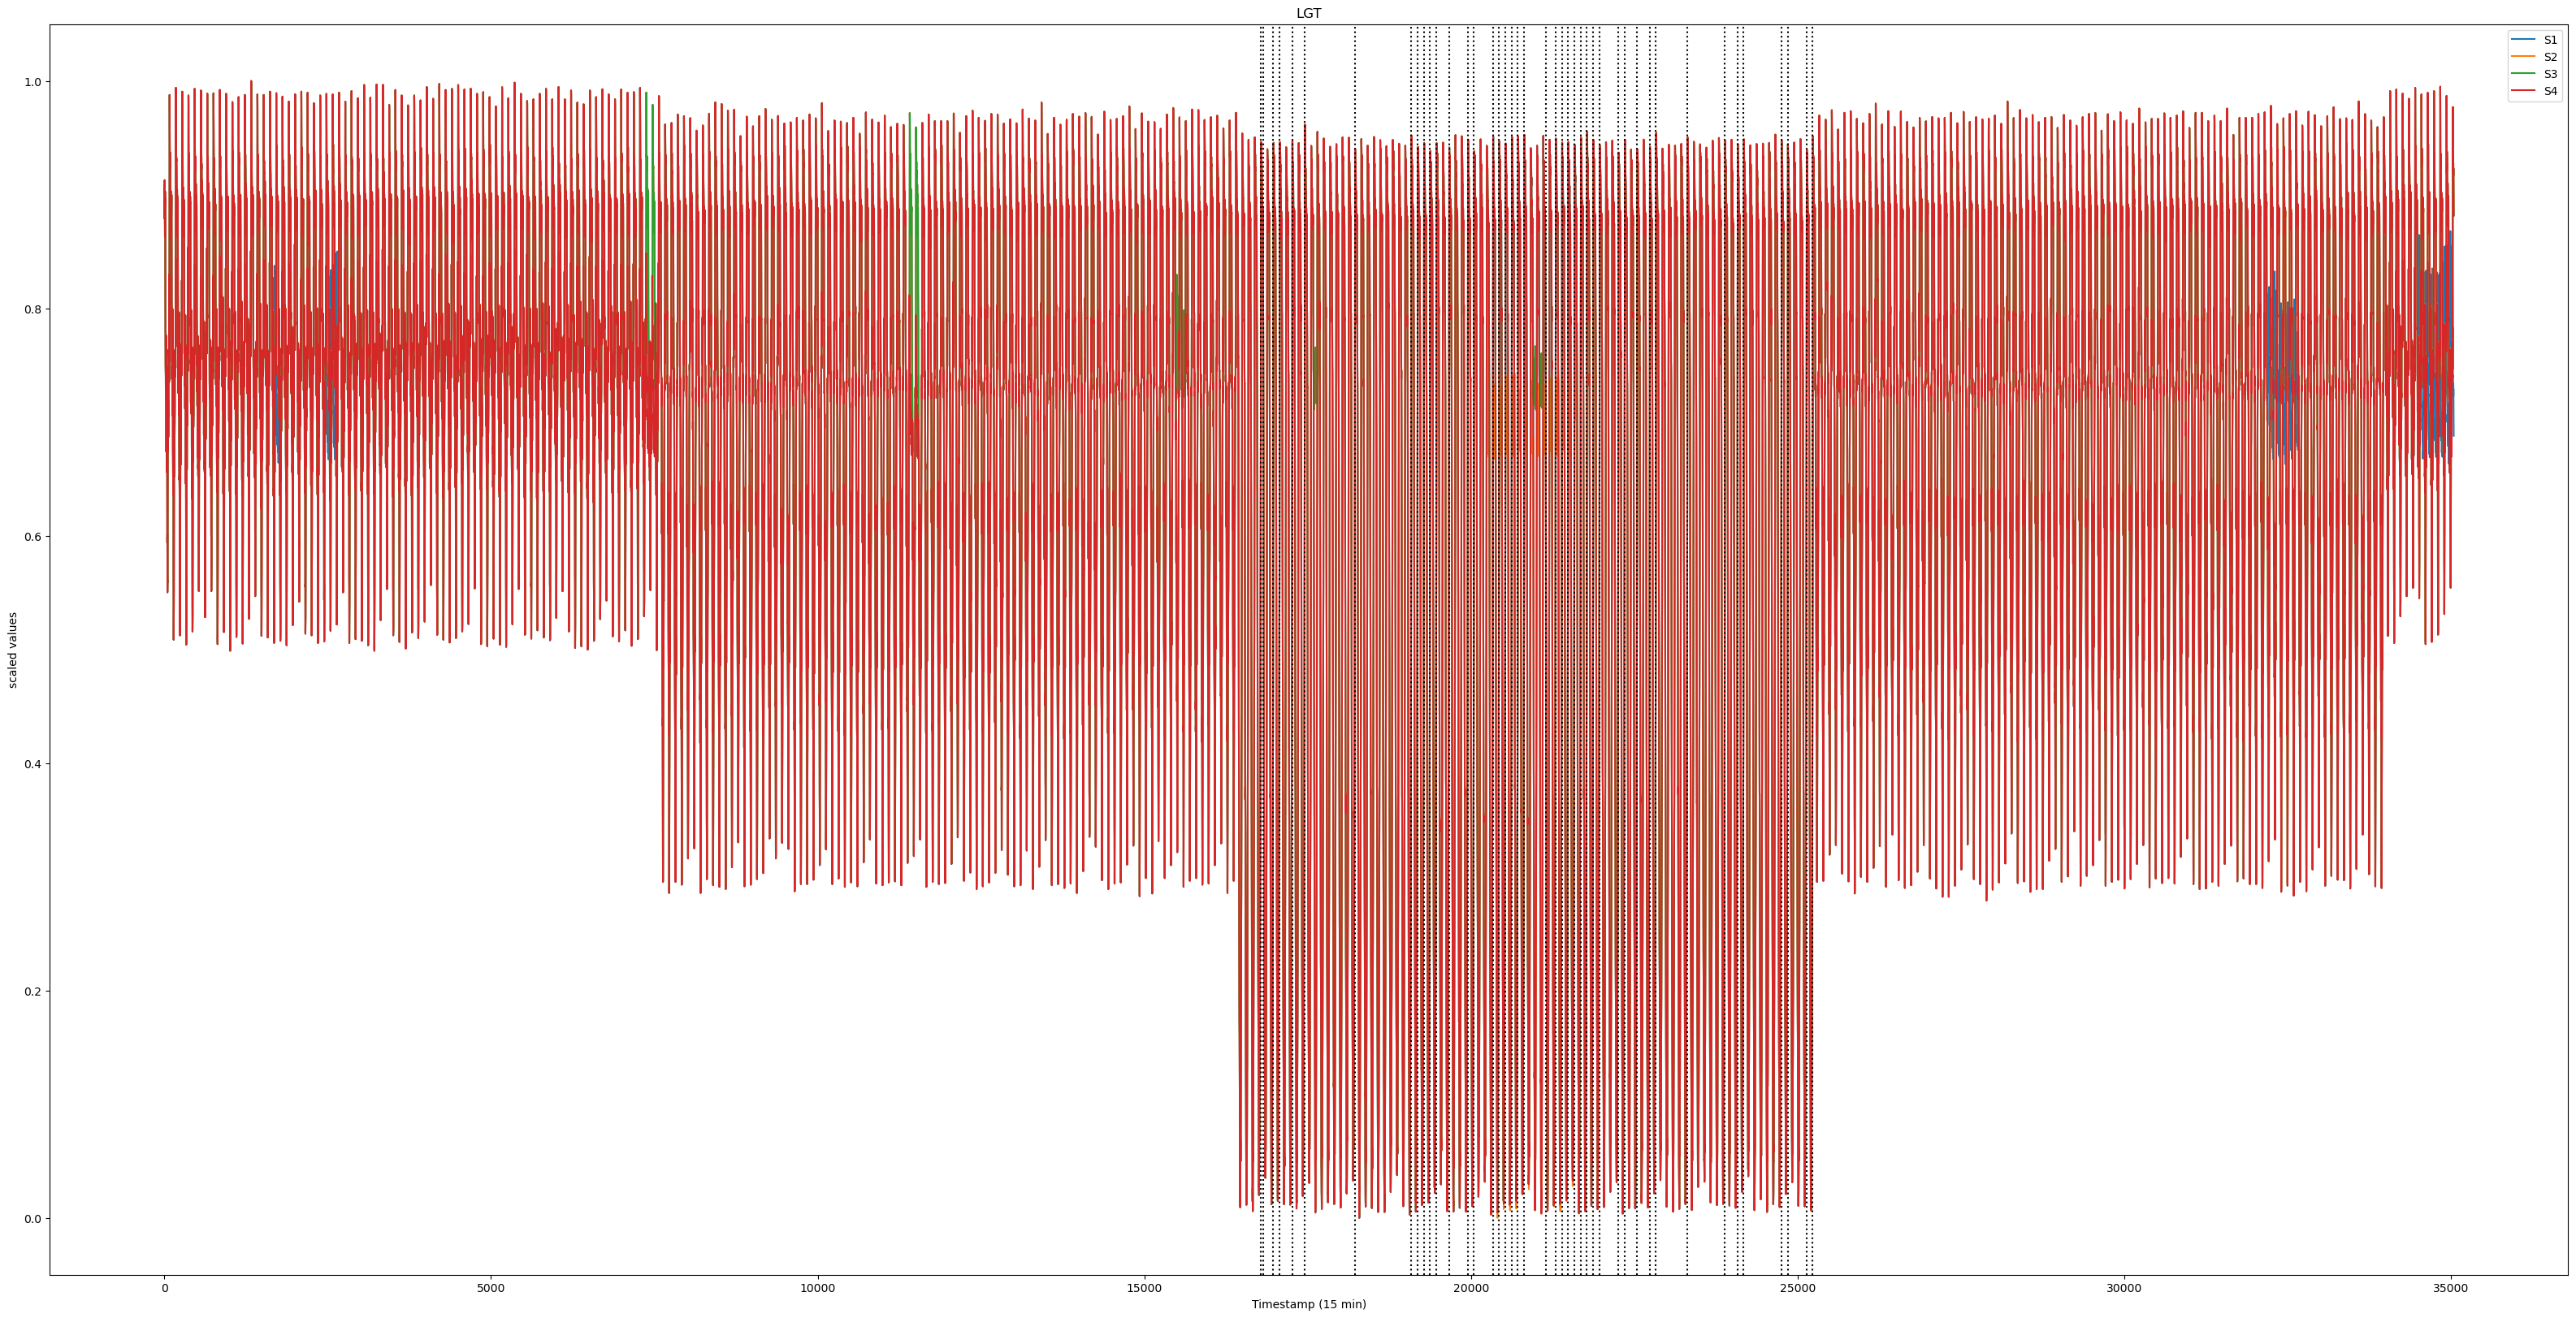

In [25]:
x = len(df_LGT_test) #96*7*4*3 
df_LGT_test_subset = df_LGT_test.head(x)
df_LGT_pred_subset = df_LGT_pred.head(x)

# Plot all columns in one plot
df_LGT_test_subset.plot(figsize=(40, 20), linestyle='-')
#df_test_label_subset['label'].plot(linestyle='-', label='label', color='red')
# Plot a vertical line when the label is 1
for timestamp, label in zip(df_LGT_pred_subset.index, df_LGT_pred_subset['0']):
    if label == 1:
        plt.axvline(x=timestamp, color='black', linestyle=':')

# Customize the plot (optional)
plt.title('LGT')
plt.xlabel('Timestamp (15 min)')
plt.ylabel('scaled values')

# Show the plot
plt.show()